1. 给定⼀个⽂件 target，请使⽤ matplotlib 可视化⼯具绘制⼀个 target的词云图，如下图所示（可配合使⽤ wordcloud）

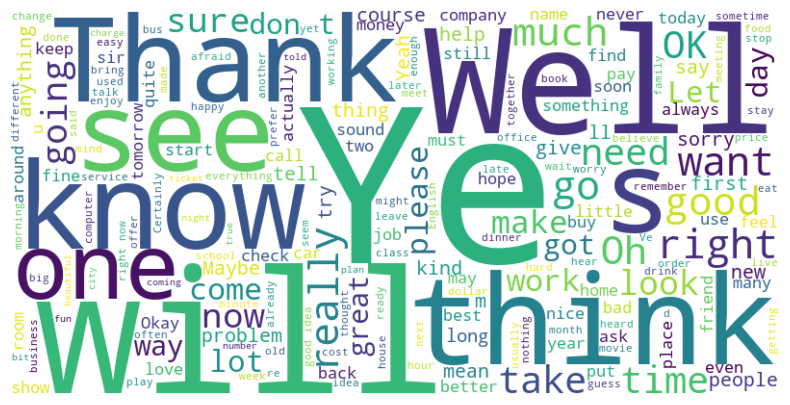

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 读取文件
file = open('target.txt', 'r', encoding='utf-8')
content = file.read()

# 生成词云图
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(content)

# 进行绘制
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # No axes
plt.show()

file.close()

In [48]:
import numpy as np
import time

# 使用numpy定义矩阵运算
def matrix_operations_numpy(A, B):
    start = time.time()
    addition = np.add(A, B)
    subtraction = np.subtract(A, B)
    multiplication = np.matmul(A, B)
    division = np.matmul(A, np.linalg.inv(B)) if B.shape[0] == B.shape[1] else None
    transpose_A = np.transpose(A)
    transpose_B = np.transpose(B)
    end = time.time()
    return addition, subtraction, multiplication, division, transpose_A, transpose_B, end - start

# 不使用numpy定义矩阵运算
def matrix_operations_no_numpy(A, B):
    start = time.time()

    # 加法
    addition = [[A[i][j] + B[i][j] for j in range(len(A[0]))] for i in range(len(A))]

    # 减法
    subtraction = [[A[i][j] - B[i][j] for j in range(len(A[0]))] for i in range(len(A))]

    # 乘法
    multiplication = [[sum(A[i][k] * B[k][j] for k in range(len(B))) for j in range(len(B[0]))] for i in range(len(A))]

    # 除法 (乘以逆矩阵)
    def inverse(matrix):
        n = len(matrix)
        identity = [[float(i == j) for i in range(n)] for j in range(n)]
        for i in range(n):
            factor = matrix[i][i]
            for j in range(n):
                matrix[i][j] /= factor
                identity[i][j] /= factor
            for k in range(n):
                if i != k:
                    factor = matrix[k][i]
                    for j in range(n):
                        matrix[k][j] -= factor * matrix[i][j]
                        identity[k][j] -= factor * identity[i][j]
        return identity

    division = None
    if len(B) == len(B[0]):
        inverse_B = inverse([row[:] for row in B])
        division = [[sum(A[i][k] * inverse_B[k][j] for k in range(len(inverse_B))) for j in range(len(inverse_B[0]))] for i in range(len(A))]

    # 转置
    transpose_A = [[A[j][i] for j in range(len(A))] for i in range(len(A[0]))]
    transpose_B = [[B[j][i] for j in range(len(B))] for i in range(len(B[0]))]

    end = time.time()
    return addition, subtraction, multiplication, division, transpose_A, transpose_B, end - start

# 随机生成测试数据, 为了对比显著, 使用200x200大小的矩阵
A = np.random.rand(200, 200)
B = np.random.rand(200, 200)

# 转换为原始list数组 以便计算
A_list = A.tolist()
B_list = B.tolist()

# 比较运行时间
numpy_results = matrix_operations_numpy(A, B)
no_numpy_results = matrix_operations_no_numpy(A_list, B_list)

print('使用numpy的计算时间为%.5f 不使用numpy的运行时间为%.5f' % (numpy_results[-1], no_numpy_results[-1]))


使用numpy的计算时间为0.00232 不使用numpy的运行时间为3.07050
